In [3]:
import scipy as sp
import scipy.stats as sps
import scipy.linalg as spl
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'image.cmap': 'cubehelix'})
%pylab inline
import time
import GPd

Populating the interactive namespace from numpy and matplotlib


In [21]:
dim=2
n_p=32
k=GPd.gen_sqexp_k_d([1.,0.1,0.2])
k2=GPd.gen_sqexp_k_d([1.,0.6,0.2])
X = sp.matrix(sp.random.uniform(-1,1,size=[n_p,dim]))
K = GPd.buildKsym_d(k,X,[[sp.NaN]]*n_p)
Kc = spl.cholesky(K, lower=True)
Y = Kc*sp.matrix(sp.random.normal(size=[n_p,1]))

[0.70170382867038295, 0.083767764006829198]


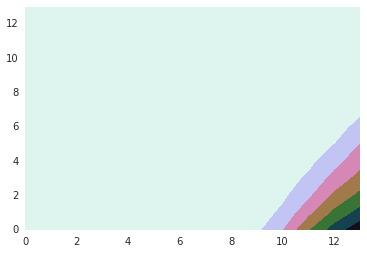

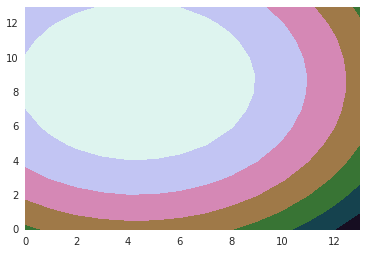

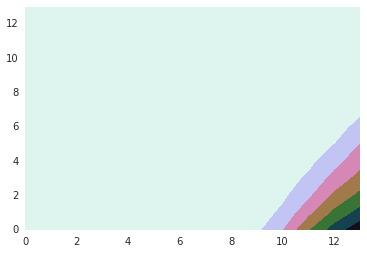

In [5]:
nplot=14
L=sp.empty([nplot,nplot])
P=sp.empty([nplot,nplot])
index=sp.logspace(-2,1,nplot)
for i,h1 in enumerate(index):
    for j,h2 in enumerate(index):
        kc=GPd.gen_sqexp_k_d([h1,h2,0.2])
        g = GPd.GPcore(X,Y,sp.vstack([10e-9]*n_p),[[sp.NaN]]*n_p,kc)
        llk=g.llk()
        lp = sp.log(sps.norm.pdf(sp.log10(h1),loc=0)*sps.norm.pdf(sp.log10(h2),loc=-1))
        L[i,j]=llk
        P[i,j]=lp
plt.contourf(L)
plt.figure()
plt.contourf(P)
plt.figure()
Post=L+P
plt.contourf(Post)
mx= unravel_index(Post.argmax(), Post.shape)

print [index[mx[0]],index[mx[1]]]


In [28]:
dim=2
n_p=150
k=GPd.gen_sqexp_k_d([1.,0.1,0.2])
X = sp.matrix(sp.random.uniform(-1,1,size=[n_p,dim]))
K = GPd.buildKsym_d(k,X,[[sp.NaN]]*n_p)
Kc = spl.cholesky(K, lower=True)
Y = Kc*sp.matrix(sp.random.normal(size=[n_p,1]))
S = sp.vstack([10e-3]*n_p)
D = [[sp.NaN]]*n_p
Data = [X,Y,S,D]

In [29]:
g = GPd.GPcore(X,Y,sp.vstack([10e-9]*n_p),[[sp.NaN]]*n_p,k2)
llk0=g.llk()
print llk0
print g.llk(extras=True)

-16776688.7267
[-16777148.917389406, 598.03142314509932, -137.84077998070089]


In [30]:
def llk_subset(D,k,n):
    [N,dim] = X.shape
    subs = sp.random.choice(N,n,replace=False)
    X_s = D[0][subs,:]
    Y_s = D[1][subs,:]
    S_s = D[2][subs,:]
    D_s = [D[3][i] for i in subs]
    
    g = GPd.GPcore(X_s,Y_s,S_s,D_s,k)
    return g.llk(extras=True)

In [31]:
for i in xrange(10):
    print llk_subset(Data,k,4)

[-1.0943487795762785, 0.28874198356673797, -3.6757541328186907]
[-8.690927412280276, 0.3556294666421384, -3.6757541328186907]
[-2.1193644079873026, 0.014987398100094512, -3.6757541328186907]
[-1.2917237958324876, 0.084965417169794041, -3.6757541328186907]
[-2.4507228829680354, 0.0244705329544763, -3.6757541328186907]
[-2.8697057716203176, 0.0081093016890491955, -3.6757541328186907]
[-3.6588394384116167, 1.1901020744757433, -3.6757541328186907]
[-1.6156858396325198, 0.013406482586797412, -3.6757541328186907]
[-4.4779689949532315, 0.074470328813792813, -3.6757541328186907]
[-3.7537194930451276, 0.96732963433892216, -3.6757541328186907]


In [108]:
#n_pts = map(int,sp.linspace(100,149,20))
n_pts = range(10,150)
n_sam = 2
n_r = n_sam*len(n_pts)
dat=[]

for n in n_pts:
    print n,
    for i in xrange(n_sam):
        lk=llk_subset(Data,k2,n)
        dat.append([n,sum(lk)]+lk)
        
lmax=llk_subset(Data,k2,150)
dat.append([150,sum(lmax)]+lmax)
df = pd.DataFrame(dat, columns=('n', 'llk','t1','t2','t3') )

10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149


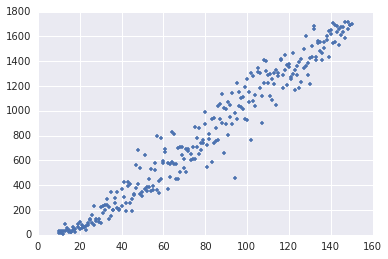

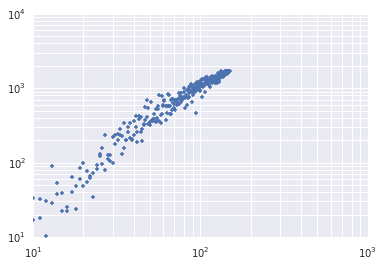

In [109]:
plt.plot(df['n'],-df['llk'],'.')
plt.figure()
plt.loglog(df['n'],-df['llk'],'.')
plt.figure()


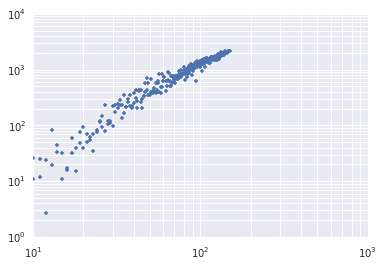

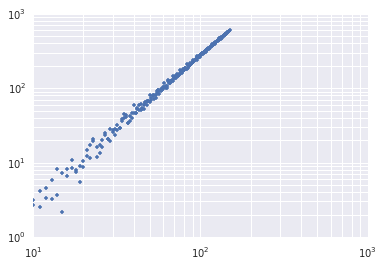

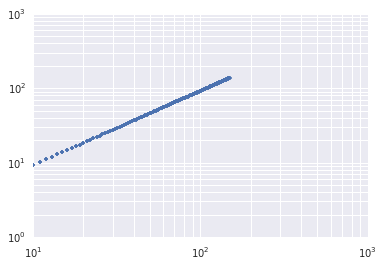

In [110]:
plt.loglog(df['n'],-df['t1'],'.')
plt.figure()
plt.loglog(df['n'],df['t2'],'.')
plt.figure()
plt.loglog(df['n'],-df['t3'],'.')
plt.figure()

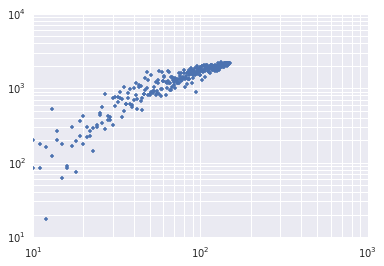

In [111]:
plt.loglog(df['n'],[(-p)*(150./(df['n'][i]))**0.75 for i,p in enumerate(df['t1'])],'.')

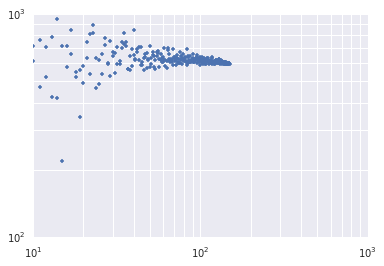

In [112]:
plt.loglog(df['n'],[(p)*(150./(df['n'][i]))**2 for i,p in enumerate(df['t2'])],'.')

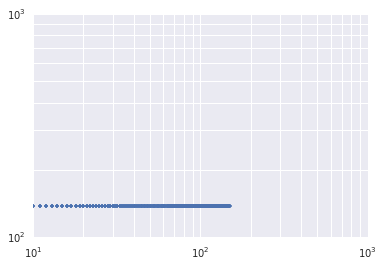

In [113]:
plt.loglog(df['n'],[(-p)*(150./(df['n'][i]))**1 for i,p in enumerate(df['t3'])],'.')

In [104]:
df['n'][i]

150